# PROBLEM STATEMENT:

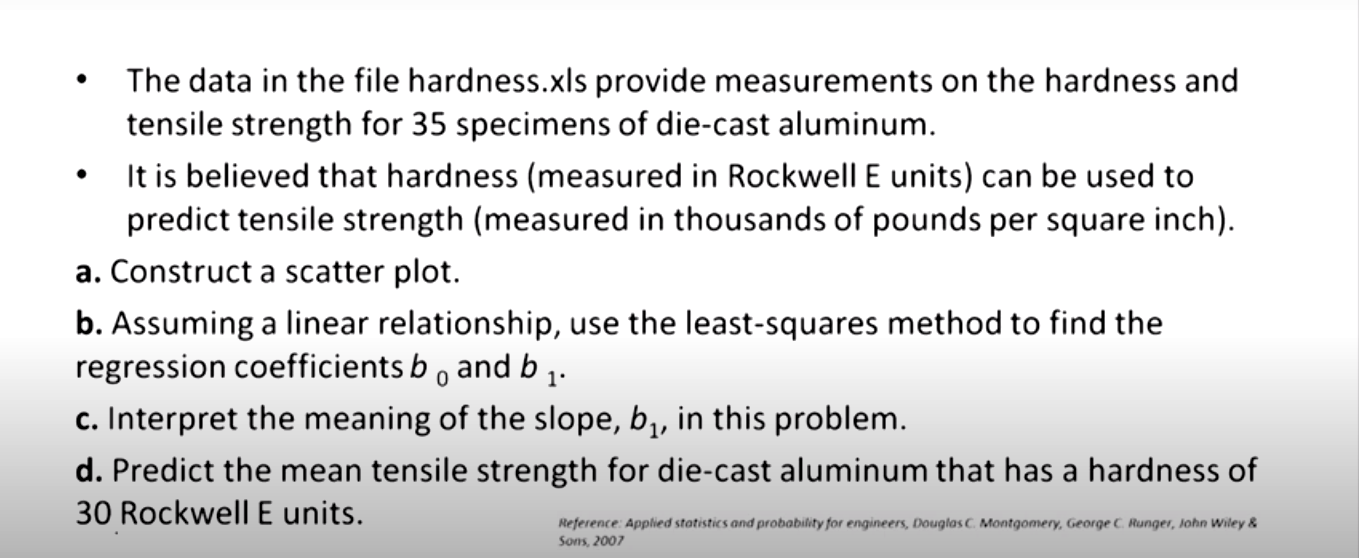

## DATA::

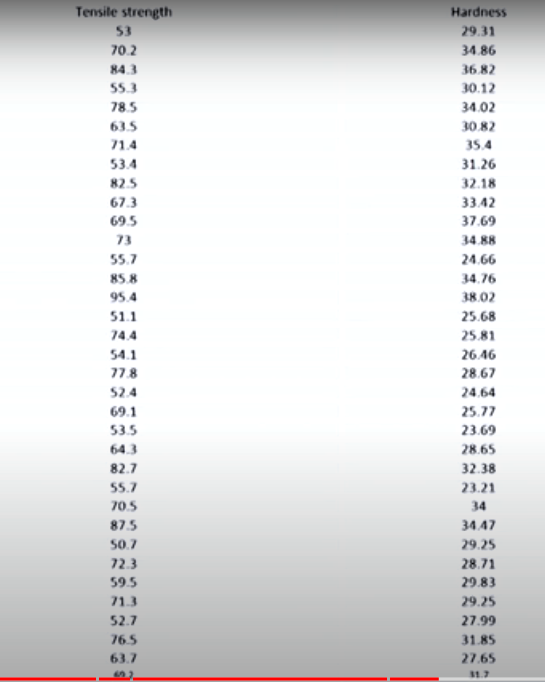

## SOLUTION::

In [1]:
import pandas as pd

In [2]:
path = '/home/ashish/projects/linearRegression3_Hardness_and_AluminiumTensileStrength/HARDNESS.xls'
data_frame = pd.read_excel(path)
data_frame

,Tensile strength,Hardness
0,53.0,29.31
1,70.2,34.86
2,84.3,36.82
3,55.3,30.12
4,78.5,34.02
5,63.5,30.82
6,71.4,35.40
7,53.4,31.26
8,82.5,32.18
9,67.3,33.42


## a.) Constructing a scatter plot::

In [3]:
import matplotlib.pyplot as plt

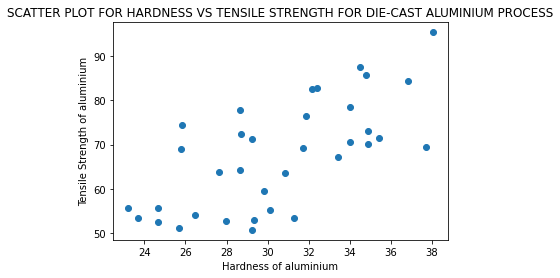

In [14]:
x = data_frame['Hardness']
y = data_frame['Tensile strength']
plt.scatter(x,y)
plt.ylabel('Tensile Strength of aluminium')
plt.xlabel('Hardness of aluminium')
##plt.xlim(40,100)
##plt.ylim(10.50)
plt.title('SCATTER PLOT FOR HARDNESS VS TENSILE STRENGTH FOR DIE-CAST ALUMINIUM PROCESS')
plt.show()

## b.) Finding the regression Coefficients::

In [63]:
import statsmodels.api as s
import statsmodels.regression.linear_model as sm

In [64]:
x = s.add_constant(x)
reg_model = sm.OLS(y,x).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     28.26
Date:                Thu, 30 Dec 2021   Prob (F-statistic):           7.26e-06
Time:                        01:12:09   Log-Likelihood:                -125.77
No. Observations:                  35   AIC:                             255.5
Df Residuals:                      33   BIC:                             258.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0483     11.689      0.517      0.608     -17.734      29.831
x1             2.0191      0.380      5.316      0.000       1.246       2.792
==============================================================================
Omnibus:                        4.035   Durbin-Watson:                   2.617
Prob(Omnibus):                  0.133   Jarque-Bera (JB):                1.679
Skew:                           0.081   Prob(JB):                        0.432
Kurtosis:                       1.939   Cond. No.                         235.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

    overall regression equation --> tensile_strength = 6.04 + 2.01*(hardness)

## Therefore, b0 = 6.04 and b1 = 2.01

## c.) interpretation of slope b1

    It signifies that tensile strength would be linearly related with the 
    hardness of aluminium as --->(2.01 * hardness + error_term = tensile_strength).

## d.) for hardness = 30 rockwell unit the mean tensile_strength::

In [68]:
mean_tensile_strength = 6.04 + (30)*2.01
print("Mean tensile stregth for 30 rockwell unit is ::  ",mean_tensile_strength)

Mean tensile stregth for 30 rockwell unit is ::   66.34


# ----------------------------------------------------------------------

## Method-2 using training and testing dataset for modelling regression and  calculating score that is R-squared Value.

In [12]:
from sklearn.model_selection import train_test_split

In [20]:
##f you have an array of shape (2,4) then reshaping it with (-1, 1), then the array will 
## get reshaped in such a way that the resulting array has only 1 column and this is 
## only possible by having 8 rows, hence, (8,1).

x = data_frame['Hardness'].values.reshape(-1,1)  ##RESHAPE-->Gives a new shape to an array without changing its data.
y = data_frame['Tensile strength'].values.reshape(-1,1) 
print("Hardness ::\n", x)
print("\nTensile Strength :: \n",y)

Hardness ::
 [[29.31]
 [34.86]
 [36.82]
 [30.12]
 [34.02]
 [30.82]
 [35.4 ]
 [31.26]
 [32.18]
 [33.42]
 [37.69]
 [34.88]
 [24.66]
 [34.76]
 [38.02]
 [25.68]
 [25.81]
 [26.46]
 [28.67]
 [24.64]
 [25.77]
 [23.69]
 [28.65]
 [32.38]
 [23.21]
 [34.  ]
 [34.47]
 [29.25]
 [28.71]
 [29.83]
 [29.25]
 [27.99]
 [31.85]
 [27.65]
 [31.7 ]]

Tensile Strength :: 
 [[53. ]
 [70.2]
 [84.3]
 [55.3]
 [78.5]
 [63.5]
 [71.4]
 [53.4]
 [82.5]
 [67.3]
 [69.5]
 [73. ]
 [55.7]
 [85.8]
 [95.4]
 [51.1]
 [74.4]
 [54.1]
 [77.8]
 [52.4]
 [69.1]
 [53.5]
 [64.3]
 [82.7]
 [55.7]
 [70.5]
 [87.5]
 [50.7]
 [72.3]
 [59.5]
 [71.3]
 [52.7]
 [76.5]
 [63.7]
 [69.2]]


## Note::
        1. If you don't mention the random_state in the code, then whenever you execute your code a new random value is generated and the train and test datasets would have different values each time.
        2. However, if you use a particular value for random_state(random_state = 1 or any other value) everytime the result will be same,i.e, same values in train and test datasets.
        
## -----------------------------------OR--------------------------------------------
        
        1. when random_state set to an integer, train_test_split will return same results for each execution.

        2. when random_state set to an None, train_test_split will return different results for each execution.

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=88) 

In [24]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((28, 1), (7, 1), (28, 1), (7, 1))

In [26]:
print("size of training data for x variable is:: ",len(x_train))
print("size of testing data for x variable is:: ",len(x_test))
print("\n\n")
print("size of training data for y variable is:: ",len(y_train))
print("size of testing data for y variable is:: ",len(y_test))

size of training data for x variable is::  28
size of testing data for x variable is::  7



size of training data for y variable is::  28
size of testing data for y variable is::  7


In [28]:
print("Training data for x variable is:: \n ",x_train)

Training data for x variable is:: 
  [[38.02]
 [34.76]
 [32.18]
 [29.31]
 [23.69]
 [30.12]
 [27.65]
 [29.25]
 [35.4 ]
 [27.99]
 [28.67]
 [31.26]
 [34.02]
 [34.88]
 [29.25]
 [36.82]
 [34.47]
 [24.66]
 [28.71]
 [25.81]
 [34.86]
 [30.82]
 [25.77]
 [37.69]
 [26.46]
 [25.68]
 [31.85]
 [23.21]]


In [32]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [41]:
print("The intercept of the regresssion model for the training dataset is::",end="  ")
print(reg.intercept_)

The intercept of the regresssion equation for the training dataset is::  [7.045691]


In [43]:
print("The coefficient or slope of the regression model for the training dataset is::",end="  ")
print(reg.coef_)

The coefficient or slope of the regresssion model for the training dataset is::  [[1.99777401]]


    Reg. model for training data = Tensile_strength = 7.04 + 1.997*(hardness) 

In [45]:
y_predict = reg.predict(x_test)
y_predict

array([[73.81129842],
       [56.27084261],
       [64.28191639],
       [66.63928973],
       [70.37512713],
       [74.97000735],
       [71.73361345]])

In [56]:
import sklearn.metrics as sklm

In [57]:
sklm.mean_squared_error(y_test,y_pred)

35.71053398209997

# Note :: Score = R-sqaured value

In [58]:
reg.score(x_test,y_test)

0.5362243730094254

# For Testing dataset
## R-squared = 53.6% ==> so this regression relationship can be considered as strong.And,53.6% of variability in the tensile strength of the aluminium  can be explained by the hardness of  aluminium i.e. by the Linear relationship between the hardness of aluminium and Its tensile strength.

In [60]:
reg.score(x_train,y_train)

0.4500146647765303

# For training dataset
## R-squared = 45% ==> so this regression relationship can be considered as strong.And,45% of variability in the tensile strength of the aluminium  can be explained by the hardness of  aluminium i.e. by the Linear relationship between the hardness of aluminium and Its tensile strength.